In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cargamos el DataFrame

Los datos recogidos en Twitter pasan a un documento CSV (Valores separados por comas). El siguiente dataframe es similar a como se ve Excel, por filas y columnas.

In [2]:
df = pd.read_csv('Tweets_cyl_filtrados.csv', dtype = {'ID':'object', 'Respuesta a tweet': 'object', 'Retweet tweet': 'object'})

In [69]:
df.head()

,Nombre,Cuenta creada,Texto,ID,Fecha,Posición,Localización (puesta por el usuario),País,Respuesta a tweet,Respuesta a usuario,Retweet tweet,Retweet user,Retweet cuenta desde,Retweet user followers,Retweet user friends,Max
0,Robcampnou67,2012-02-20 13:53:08+00:00,¡De Madrid al Zendal!,1344090407693647878,2020-12-30 01:18:19+00:00,NaN,valladolid,NaN,NaN,NaN,1343999799914360835,SonrisaLetal,2020-04-02 00:08:56+00:00,4637.0,4051.0,0.8
1,Robcampnou67,2012-02-20 13:53:08+00:00,Si Fernando Simón llega a ser el nuevo ministr...,1344273277326422016,2020-12-30 13:24:59+00:00,NaN,valladolid,NaN,NaN,NaN,1344253156146995205,h0m3r02,2010-08-23 15:55:29+00:00,14247.0,8488.0,0.8
2,Robcampnou67,2012-02-20 13:53:08+00:00,¿A qué ahora ya no os parece tan tontita? http...,1344273447715811330,2020-12-30 13:25:39+00:00,NaN,valladolid,NaN,NaN,NaN,1344259416716169219,SonrisaLetal,2020-04-02 00:08:56+00:00,4649.0,4050.0,0.8
3,Robcampnou67,2012-02-20 13:53:08+00:00,Quiero pensar que hay un seguimiento para que ...,1344282179518558208,2020-12-30 14:00:21+00:00,NaN,valladolid,NaN,NaN,NaN,1344064498274095106,Val_Wiggins2,2015-07-08 13:45:12+00:00,2809.0,2990.0,0.8
4,Robcampnou67,2012-02-20 13:53:08+00:00,A las 07:29 h. de este sábado llegaban al alma...,1344447063996694529,2020-12-31 00:55:33+00:00,NaN,valladolid,NaN,NaN,NaN,1342763548569698310,salvadorilla,2011-01-02 18:17:18+00:00,94317.0,448.0,0.8


#### Cargamos la lista de Bots

Previamente hemos sacado los nombres del dataframe y los hemos pasado por la herramienta BotoMeter. Esta herramienta utiliza inteligencia artificial para comprobar el comportamiento de los distintos perfiles y determinar, en una escala del 0.0 al 1.0, si tiene algun comportamiento no natural. 

In [4]:
df_bots = pd.read_csv('bots_cyl.csv')

Hallamos el valor máximo de todas las columnas para cada una de las filas (usuarios). No contamos con los valores generales 'Cap English' ni 'Cap Universal'

In [70]:
df_bots.head()

,Nombre,Cap English,Cap Universal,English astroturf,English Fake Followers,English Financial,English Other,"English, Overall",English Self Declared,English Spammer,Universal astroturf,Universal Fake Followers,Universal Financial,Universal Other,Universal Overall,Universal Self Declared,Universal Spammer,Max
0,Robcampnou67,0.80088,0.81935,0.74,0.14,0.00,0.60,0.74,0.00,0.01,0.80,0.09,0.00,0.25,0.80,0.00,0.01,0.80
1,charrisca,0.79573,0.62070,0.22,0.23,0.03,0.56,0.42,0.00,0.07,0.19,0.03,0.01,0.29,0.15,0.00,0.03,0.56
2,lunarcitos__,0.52887,0.00000,0.09,0.04,0.00,0.49,0.12,0.00,0.02,0.06,0.03,0.00,0.17,0.00,0.00,0.00,0.49
3,Valladoliden24,0.92354,0.93384,0.11,0.47,0.18,0.90,0.97,0.97,0.58,0.10,0.56,0.13,0.91,0.99,0.99,0.53,0.99
4,jbcharro,0.80088,0.59824,0.74,0.21,0.01,0.61,0.74,0.02,0.00,0.69,0.21,0.00,0.55,0.14,0.00,0.00,0.74


In [6]:
df_bots['Max'] = df_bots.loc[:, 'English astroturf': 'Universal Spammer'].max(axis=1)

Añadimos al dataframe el valor máximo de la puntuación obtenida en Botometer.

In [7]:
df = pd.merge(df, df_bots[['Nombre', 'Max']], left_on='Nombre', right_on='Nombre')

In [71]:
df.head()

,Nombre,Cuenta creada,Texto,ID,Fecha,Posición,Localización (puesta por el usuario),País,Respuesta a tweet,Respuesta a usuario,Retweet tweet,Retweet user,Retweet cuenta desde,Retweet user followers,Retweet user friends,Max
0,Robcampnou67,2012-02-20 13:53:08+00:00,¡De Madrid al Zendal!,1344090407693647878,2020-12-30 01:18:19+00:00,NaN,valladolid,NaN,NaN,NaN,1343999799914360835,SonrisaLetal,2020-04-02 00:08:56+00:00,4637.0,4051.0,0.8
1,Robcampnou67,2012-02-20 13:53:08+00:00,Si Fernando Simón llega a ser el nuevo ministr...,1344273277326422016,2020-12-30 13:24:59+00:00,NaN,valladolid,NaN,NaN,NaN,1344253156146995205,h0m3r02,2010-08-23 15:55:29+00:00,14247.0,8488.0,0.8
2,Robcampnou67,2012-02-20 13:53:08+00:00,¿A qué ahora ya no os parece tan tontita? http...,1344273447715811330,2020-12-30 13:25:39+00:00,NaN,valladolid,NaN,NaN,NaN,1344259416716169219,SonrisaLetal,2020-04-02 00:08:56+00:00,4649.0,4050.0,0.8
3,Robcampnou67,2012-02-20 13:53:08+00:00,Quiero pensar que hay un seguimiento para que ...,1344282179518558208,2020-12-30 14:00:21+00:00,NaN,valladolid,NaN,NaN,NaN,1344064498274095106,Val_Wiggins2,2015-07-08 13:45:12+00:00,2809.0,2990.0,0.8
4,Robcampnou67,2012-02-20 13:53:08+00:00,A las 07:29 h. de este sábado llegaban al alma...,1344447063996694529,2020-12-31 00:55:33+00:00,NaN,valladolid,NaN,NaN,NaN,1342763548569698310,salvadorilla,2011-01-02 18:17:18+00:00,94317.0,448.0,0.8


Creamos un DataFrame intermedio para juntarlo con los bots y que nos diga si de los usuarios más activos existe algún bot

In [9]:
df_intermedio = df['Nombre'].value_counts().to_frame().reset_index().rename(columns={'index':'Nombre', 'Nombre':'Tweets'})

In [10]:
df_actividadybots = pd.merge(df_intermedio, df_bots[['Nombre', 'Cap English', 'Cap Universal', 'Max']], right_on='Nombre', left_on='Nombre')

#### La herramienta botometer considera que por encima de una puntuaciónd e 0.65 en alguno de los campos, la cuenta tiene un comportamiento no natural, quizás automatizado.

In [79]:
df_actividadybots.head(20)

,Nombre,Tweets,Cap English,Cap Universal,Max
0,ElGranPitu,155,0.79699,0.77335,0.56
1,drmiguelmarcos,154,0.78740,0.62070,0.56
2,jbcharro,95,0.80088,0.59824,0.74
3,Amor_y_Rabia,83,0.79679,0.80500,0.59
4,ElviraSivelo,83,0.79660,0.82526,0.82
5,noticiascyl,77,0.90780,0.88853,0.95
6,MagdaDG1,65,0.79899,0.81935,0.80
7,EvaMara79493013,58,0.79708,0.80541,0.68
8,diariodeburgos,52,0.83959,0.80913,0.86
9,altwitmat1,51,0.79664,0.80514,0.65


Convertimos las columnas 'Fecha', 'Cuenta creada', 'Retweet cuenta desde' y  a un formato de tiempo.

In [12]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [13]:
df['Cuenta creada'] = pd.to_datetime(df['Cuenta creada'])

In [14]:
df['Retweet cuenta desde'] = pd.to_datetime(df['Retweet cuenta desde'])

In [73]:
df.head()

,Nombre,Cuenta creada,Texto,ID,Fecha,Posición,Localización (puesta por el usuario),País,Respuesta a tweet,Respuesta a usuario,Retweet tweet,Retweet user,Retweet cuenta desde,Retweet user followers,Retweet user friends,Max
0,Robcampnou67,2012-02-20 13:53:08+00:00,¡De Madrid al Zendal!,1344090407693647878,2020-12-30 01:18:19+00:00,NaN,valladolid,NaN,NaN,NaN,1343999799914360835,SonrisaLetal,2020-04-02 00:08:56+00:00,4637.0,4051.0,0.8
1,Robcampnou67,2012-02-20 13:53:08+00:00,Si Fernando Simón llega a ser el nuevo ministr...,1344273277326422016,2020-12-30 13:24:59+00:00,NaN,valladolid,NaN,NaN,NaN,1344253156146995205,h0m3r02,2010-08-23 15:55:29+00:00,14247.0,8488.0,0.8
2,Robcampnou67,2012-02-20 13:53:08+00:00,¿A qué ahora ya no os parece tan tontita? http...,1344273447715811330,2020-12-30 13:25:39+00:00,NaN,valladolid,NaN,NaN,NaN,1344259416716169219,SonrisaLetal,2020-04-02 00:08:56+00:00,4649.0,4050.0,0.8
3,Robcampnou67,2012-02-20 13:53:08+00:00,Quiero pensar que hay un seguimiento para que ...,1344282179518558208,2020-12-30 14:00:21+00:00,NaN,valladolid,NaN,NaN,NaN,1344064498274095106,Val_Wiggins2,2015-07-08 13:45:12+00:00,2809.0,2990.0,0.8
4,Robcampnou67,2012-02-20 13:53:08+00:00,A las 07:29 h. de este sábado llegaban al alma...,1344447063996694529,2020-12-31 00:55:33+00:00,NaN,valladolid,NaN,NaN,NaN,1342763548569698310,salvadorilla,2011-01-02 18:17:18+00:00,94317.0,448.0,0.8


### Vamos a comprobar cuantos "Bots" tenemos en nuestro DataFrame

Los 4829 los podemos poner en distintos rangos para comprobar cómo es nuestro set de datos

In [16]:
df['Nombre'].nunique()

686

De nuestro set de datos existen 4829 registros pero las cuentas únicas son 686.

Como los valores de Botometer están emparejados con el nombre y no cambian, podemos eliminar los nombres duplicados para hallar la distribución de los bots.

In [17]:
df_unique = df.drop_duplicates('Nombre')

In [74]:
df_unique.head()

,Nombre,Cuenta creada,Texto,ID,Fecha,Posición,Localización (puesta por el usuario),País,Respuesta a tweet,Respuesta a usuario,Retweet tweet,Retweet user,Retweet cuenta desde,Retweet user followers,Retweet user friends,Max
0,Robcampnou67,2012-02-20 13:53:08+00:00,¡De Madrid al Zendal!,1344090407693647878,2020-12-30 01:18:19+00:00,NaN,valladolid,NaN,NaN,NaN,1343999799914360835,SonrisaLetal,2020-04-02 00:08:56+00:00,4637.0,4051.0,0.80
17,charrisca,2018-02-13 08:41:27+00:00,Comparativa covid19 vs vacunas covid19 en los ...,1344092213102444544,2020-12-30 01:25:30+00:00,NaN,"Salamanca,España",NaN,NaN,NaN,1343641257428529156,JacoboMendioroz,2011-05-06 12:55:12+00:00,9128.0,1578.0,0.56
68,lunarcitos__,2013-04-16 15:54:34+00:00,Araceli vacunada: gracias a Dios\nJordi: perdo...,1344099529768001537,2020-12-30 01:54:34+00:00,NaN,"Salamanca, España",NaN,NaN,NaN,1344076496768552960,elamigoteo,2016-12-26 16:45:16+00:00,193.0,525.0,0.49
85,Valladoliden24,2017-05-27 16:45:28+00:00,Almazán (Soria) registra 20 casos positivos de...,1344123554921508865,2020-12-30 03:30:02+00:00,NaN,"Valladolid, España",NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.99
87,jbcharro,2009-12-16 17:55:54+00:00,4.000 profesionales sanitarios españoles refue...,1344146777210036226,2020-12-30 05:02:19+00:00,NaN,Salamanca,NaN,NaN,NaN,1343967987229990914,Juanmi_News,2011-04-11 12:02:23+00:00,79677.0,2962.0,0.74


#### Dividimos por grupos de puntuación en Botometer los distintos perfiles

Creamos varios grupos, aquellos que están entre 0.0 y 0.1, entre 0.1 y 0.2... hasta 0.9 y 1.0

In [19]:
(pd.cut(df_unique['Max'], np.linspace(0.0, 1.0, 11))).value_counts(sort=False)

(0.0, 0.1]      0
(0.1, 0.2]      1
(0.2, 0.3]     16
(0.3, 0.4]     89
(0.4, 0.5]    175
(0.5, 0.6]    134
(0.6, 0.7]     96
(0.7, 0.8]     75
(0.8, 0.9]     64
(0.9, 1.0]     34
Name: Max, dtype: int64

También podemos normalizarlo para ver qué porcentajede cuentas están por encima de 0.70

In [20]:
(pd.cut(df_unique['Max'], np.linspace(0.0, 1.0, 11))).value_counts(sort=False, normalize=True)

(0.0, 0.1]    0.000000
(0.1, 0.2]    0.001462
(0.2, 0.3]    0.023392
(0.3, 0.4]    0.130117
(0.4, 0.5]    0.255848
(0.5, 0.6]    0.195906
(0.6, 0.7]    0.140351
(0.7, 0.8]    0.109649
(0.8, 0.9]    0.093567
(0.9, 1.0]    0.049708
Name: Max, dtype: float64

El 25,9% de las cuentas registradas en nuestro set de datos está por encima de 0.70 en la puntiación de Botometer

In [21]:
(pd.cut(df_unique['Max'], np.linspace(0.0, 1.0, 11))).value_counts(sort=False, normalize=True)[-3:].sum()

0.2529239766081871

Vamos a comprobarlo con el set de datos con todos los tweets, no con las cuentas únicas.

In [22]:
(pd.cut(df['Max'], np.linspace(0.0, 1.0, 11))).value_counts(sort=False)

(0.0, 0.1]       0
(0.1, 0.2]       1
(0.2, 0.3]      39
(0.3, 0.4]     308
(0.4, 0.5]     795
(0.5, 0.6]    1283
(0.6, 0.7]     723
(0.7, 0.8]     615
(0.8, 0.9]     543
(0.9, 1.0]     505
Name: Max, dtype: int64

In [23]:
(pd.cut(df['Max'], np.linspace(0.0, 1.0, 11))).value_counts(sort=False, normalize=True)[-3:].sum()

0.34559434746467166

El 34,5% de los tweets provienen de cuentas con una puntuación de bot > 0.70. Los bots están haciendo lo esperado, un 25% de las cuentas registradas son sospechosas de ser bots y copan con un 34,5% el total de los Tweets. Menos hacen más ruido. 

#### De forma gráfica

Si miramos los usuarios únicos parece casi una distribución normal, mientras que si vemos el número total de tweets en el set de datos completos vemos como aquellos que puntúan alto en BotoMeter tienen gran cantidad de tweets.

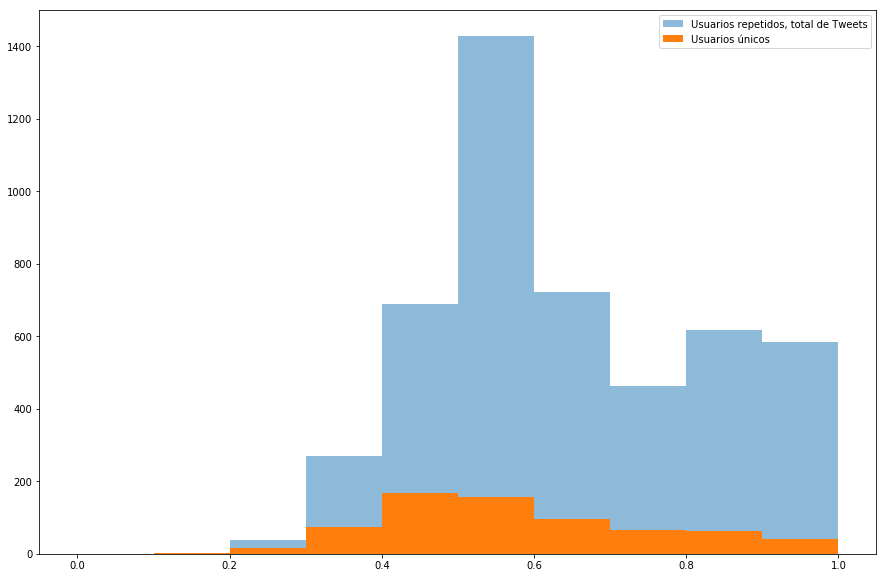

In [24]:
plt.figure(figsize=(15,10))
plt.hist(df['Max'],alpha=0.5,bins=np.linspace(0,1,11), label='Usuarios repetidos, total de Tweets')
plt.hist(df_unique['Max'], bins=np.linspace(0,1,11), label='Usuarios únicos')
plt.legend()

## Qué pasa con las cuentas de alta puntuación

En nuestro DataFrame seleccionamos solo las cuentas con una alta puntuación

In [25]:
df_max = df[df['Max'] >= 0.70]

### Más al detalle. Comprobamos si existen textos iguales que NO incluyan los retweets (en el set de datos se computan como textos iguales)

In [26]:
df_max[df_max['Retweet tweet'].isna()]['Texto'].value_counts()

Las gracias al votante SOCIATA.                                                                                                                                                                                                                                                                                          3
si la pandemia prosigue años, creo que se volveran a POBLAR LOS PEUBLOS mas semi abandonados...El ser busca relax, y la calidad de vida de un pueblecito......menos stress y más salud....y más LIBERTADES........                                                                                                       2
O EL CESAR CARBALLO...ya sabemos todos que los funcionarios de SANIDAD no son OBAMA BAILANDO si no unos sosos sentados en la oscuridad de la disco pub -LAMIENDOSE LOS LABIOS VIENDO A LAS TIAS BUENAS CON TETAS..........en fin el puritanismo de los 60 sigue vivo.....ESTO ES SPAIN.                                  2
🔴 A MARCHAS FORZADAS: DE UN PLUMAZO 234.000  HABITANTES

#### Comprobamos el primer texto

Se trata de un usuario que está haciendo spam de varias noticias pero siempre con el mismo texto

In [27]:
df[df['Texto'].str.contains('Las gracias al votante SOCIATA')]

,Nombre,Cuenta creada,Texto,ID,Fecha,Posición,Localización (puesta por el usuario),País,Respuesta a tweet,Respuesta a usuario,Retweet tweet,Retweet user,Retweet cuenta desde,Retweet user followers,Retweet user friends,Max
2026,algucas,2013-10-24 14:55:15+00:00,Las gracias al votante SOCIATA.,1344713697034448897,2020-12-31 18:35:03+00:00,NaN,Valladolid,España,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.7
2038,algucas,2013-10-24 14:55:15+00:00,Las gracias al votante SOCIATA.\nAndalucía pid...,1345670669481234432,2021-01-03 09:57:43+00:00,NaN,Valladolid,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.7
2043,algucas,2013-10-24 14:55:15+00:00,Las gracias al votante SOCIATA.,1346076784287227904,2021-01-04 12:51:28+00:00,NaN,Valladolid,España,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.7
2045,algucas,2013-10-24 14:55:15+00:00,Las gracias al votante SOCIATA.,1346390427126149122,2021-01-05 09:37:47+00:00,NaN,Valladolid,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.7


https://twitter.com/algucas/status/1344713697034448897

https://twitter.com/algucas/status/1345670669481234432

https://twitter.com/algucas/status/1346076784287227904

https://twitter.com/algucas/status/1346390427126149122

De un vistazo podemos ver algunos de sus tweets

In [76]:
df[df['Nombre'] == 'algucas']

,Nombre,Cuenta creada,Texto,ID,Fecha,Posición,Localización (puesta por el usuario),País,Respuesta a tweet,Respuesta a usuario,Retweet tweet,Retweet user,Retweet cuenta desde,Retweet user followers,Retweet user friends,Max
2011,algucas,2013-10-24 14:55:15+00:00,¿A nadie le sorprende la casi nula tasa de mor...,1344235009050341382,2020-12-30 10:52:55+00:00,NaN,Valladolid,NaN,NaN,NaN,1344213872698384386,RodrigoDdeV13,2013-01-22 16:22:26+00:00,25427.0,13737.0,0.7
2012,algucas,2013-10-24 14:55:15+00:00,No sé qué habrán hecho los pobres catalanes pa...,1344269586510864386,2020-12-30 13:10:19+00:00,NaN,Valladolid,NaN,NaN,NaN,1344241496736866304,ivanedlm,2009-06-20 10:27:05+00:00,289145.0,3719.0,0.7
2013,algucas,2013-10-24 14:55:15+00:00,Contra el estado totalitario; MINARQUISMO\n#PU...,1344273589055463427,2020-12-30 13:26:13+00:00,NaN,Valladolid,NaN,NaN,NaN,1344243143730978818,Barandaand,2013-06-07 14:21:34+00:00,10964.0,8662.0,0.7
2014,algucas,2013-10-24 14:55:15+00:00,Hay que tener excesiva seguridad para presenta...,1344303906705330180,2020-12-30 15:26:41+00:00,NaN,Valladolid,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.7
2015,algucas,2013-10-24 14:55:15+00:00,SOCIATAS catalanes mal les quiere el TRAIDOR m...,1344316534840295424,2020-12-30 16:16:52+00:00,NaN,Valladolid,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.7
2016,algucas,2013-10-24 14:55:15+00:00,Te matan antes de nacer. Te matan en la vejez ...,1344318807704285189,2020-12-30 16:25:54+00:00,NaN,Valladolid,NaN,NaN,NaN,1344318555110699009,abuelillolillo,2012-07-01 14:30:05+00:00,777.0,1288.0,0.7
2017,algucas,2013-10-24 14:55:15+00:00,Illa se larga en mitad de la pandemia y en ple...,1344348938615234562,2020-12-30 18:25:38+00:00,NaN,Valladolid,NaN,NaN,NaN,1344344473048932358,martamartin000,2014-01-31 22:06:30+00:00,1106.0,1113.0,0.7
2018,algucas,2013-10-24 14:55:15+00:00,El socialismo.,1344351795422916609,2020-12-30 18:36:59+00:00,NaN,Valladolid,España,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.7
2019,algucas,2013-10-24 14:55:15+00:00,"Palabra SOCIATA, fíense.",1344353783376179206,2020-12-30 18:44:53+00:00,NaN,Valladolid,España,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.7
2020,algucas,2013-10-24 14:55:15+00:00,No le pesan los 80.000 muertos.,1344361766537601025,2020-12-30 19:16:36+00:00,NaN,Valladolid,España,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.7


#### ¿A quién hace RT esta persona?

In [28]:
df[df['Nombre'] == 'algucas']['Retweet user'].value_counts()

Barandaand         3
GuajeSalvaje       2
RafadelaGuerra     1
leboswki           1
ecd_               1
ivanedlm           1
periodistadigit    1
Macarena_Olona     1
PepeWilliamMunn    1
ldpsincomplejos    1
WillyTolerdoo      1
martamartin000     1
diostuitero        1
abuelillolillo     1
isaacj             1
RodrigoDdeV13      1
Name: Retweet user, dtype: int64

#### Nunca ha respondido a nadie durante el proceso de recogida de los tweets

In [29]:
df[df['Nombre'] == 'algucas']['Respuesta a usuario'].value_counts()

Series([], Name: Respuesta a usuario, dtype: int64)

#### ¿Alguna de esas personas a las que hace RT es de Castilla y León?

In [43]:
df[df['Nombre'].isin(df[df['Nombre'] == 'algucas']['Retweet user'].value_counts().index.tolist())]

,Nombre,Cuenta creada,Texto,ID,Fecha,Posición,Localización (puesta por el usuario),País,Respuesta a tweet,Respuesta a usuario,Retweet tweet,Retweet user,Retweet cuenta desde,Retweet user followers,Retweet user friends,Max


No, ninguna de las personas a las que hace RT es de CyL

### ¿Qué hashtag utiliza?

In [61]:
df[df['Nombre'] == 'algucas']['Texto'].str.extractall(r'(#\w*)')[0].value_counts()

#PLANDEMIA        2
#LUCHA            1
#NOM              1
#NWO              1
#DESPIERTA        1
#PUTADICTADURA    1
#CORONATIMO       1
#PUTAFARSA        1
Name: 0, dtype: int64

### ¿Qué hashtag se están utilizando más en el DataFrame de las personas con una mayor puntuación en Botometer?

Del 1 al 29

In [77]:
df_max['Texto'].str.extractall(r'(#\w*)')[0].value_counts()[:30]

#COVID19              107
#coronavirus          100
#Ávila                 44
#Coronavirus           37
#Segovia               35
#CastillayLeón         29
#Salamanca             23
#Burgos                18
#Alerta3               16
#pandemia              16
#COVID_19              15
#VacunaCOVID19         13
#YoMeVacuno            13
#Sanidad               12
#Covid19               11
#Corpivensa            10
#covid                 10
#AUDIO                 10
#Covid                 10
#Valladolid            10
#Alerta1                8
#TeamVox                8
#Alerta4                8
#COVIDー19               8
#Alerta2                8
#Covid_19               7
#EquiparacionYa         7
#COVID                  6
#2021DeProsperidad      6
#2021Bicentenario       6
Name: 0, dtype: int64

Del 30 al 59

In [78]:
df_max['Texto'].str.extractall(r'(#\w*)')[0].value_counts()[31:60]

#CastillayLeon             6
#ChicasVox52               5
#seguro                    5
#golf                      5
#Pingüinos2021             5
#CastillaYLeón             5
#cesped                    5
#La8N                      5
#datosabiertos             5
#vacuna                    5
#naturaleza                5
#recomendacion             5
#deporte                   5
#ocio                      5
#2Ene                      4
#SaludPúblicaCyL           4
#SputnikVParaElPueblo      4
#covid19                   4
#ChicasVox                 4
#FelizAñoNuevo             3
#SoyEnfermeraYoTeVacuno    3
#Economía                  3
#oportunidades             3
#CyLTVNoticias             3
#30Dic                     3
#Corpindustrias            3
#PLANDEMIA                 3
#la                        3
#VÍDEO                     3
Name: 0, dtype: int64